In [0]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re
import collections
import nltk  
import bs4 as bs  
import urllib.request  
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\周奇寰\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\周奇寰\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Read a pre-trained word2vec model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

model.vector_size

300

In [0]:
#Read the metadata file
with open('C:/Users/周奇寰/Desktop/train/train.json') as json_file:
    data = json.load(json_file)
    
csv_result = pd.DataFrame(data)
csv_result


,claim,claimant,date,id,label,related_articles
0,A line from George Orwell's novel 1984 predict...,,2017-07-17,0,0,"[122094, 122580, 130685, 134765]"
1,Maine legislature candidate Leslie Gibson insu...,,2018-03-17,1,2,"[106868, 127320, 128060]"
2,A 17-year-old girl named Alyssa Carson is bein...,,2018-07-18,4,1,"[132130, 132132, 149722]"
3,In 1988 author Roald Dahl penned an open lette...,,2019-02-04,5,2,"[123254, 123418, 127464]"
4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]"
5,"Rhode Island is ""almost dead last"" among North...",Leonidas Raptakis,2014-02-11,7,2,"[8284, 3768, 20091, 82368, 73148, 4493]"
6,The poorest counties in the U.S. are in Appala...,Jim Webb,2014-11-19,8,1,"[70709, 70708]"
7,Koch Industries paid the legal fees of George ...,,2013-07-18,9,0,"[120591, 120592, 127866, 129483]"
8,"""Minnesota, Michigan, Iowa already have 70 mph...",Robin Vos,2013-08-22,11,1,"[69547, 80095, 7994, 81116, 77621]"
9,"""FBI Uniform Crime Report for 2016 shows more ...",Nick Schroer,2017-10-17,12,1,"[72012, 26005, 43481, 55671]"


In [0]:
#Read leabels
labels = csv_result['label']
labels_list = [label for label in labels]

In [0]:
#Convert to vectors
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

In [0]:
#Preprocessing the data
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

In [0]:
# Grab all the titles 
article_titles = csv_result['claim']
# Create a list of strings, one for each title
titles_list = [title for title in article_titles]

claim_result = []
# Preprocessing the claim
for i in range(len(article_titles)):
    string = ''.join(article_titles[i])
    claim_result.append(preprocess(string))

['line', 'george', 'orwell', 'novel', 'predicts', 'power', 'smartphones']


In [0]:
# Convert the claims to 300-dim vectors
claim_vec = []
for i in range(len(claim_result)):
    claim_vec.append(document_vector(model, claim_result[i]))
claim_vec[0]

array([ 7.94270858e-02, -1.83919277e-02, -3.47391777e-02,  1.34358719e-01,
       -1.22477211e-01, -5.63964844e-02, -1.23697920e-02, -1.24145508e-01,
        9.46451798e-02,  9.33837891e-03, -6.65995255e-02, -5.34667969e-02,
        6.69148788e-02, -5.07202148e-02, -4.69360352e-02,  1.22070312e-02,
        1.56656895e-02,  9.26310197e-02,  4.64274101e-02, -9.47265625e-02,
       -6.33290634e-02, -3.67838554e-02,  1.28458664e-01, -9.21122208e-02,
       -1.02539062e-02,  5.58064766e-02, -1.55517578e-01,  1.25284836e-01,
        1.31022139e-02,  2.03857422e-02, -8.52966309e-02, -6.64062500e-02,
       -7.83996582e-02,  5.30598946e-02, -6.38834620e-03, -2.57161465e-02,
       -1.32588699e-01,  9.53741074e-02,  4.39656563e-02, -8.95182311e-04,
        1.62760422e-04, -1.11490883e-01,  1.56290695e-01,  4.88993339e-02,
       -4.74039698e-03, -4.56746407e-02,  1.14542646e-02, -5.27750663e-02,
       -1.23432793e-01, -5.76985665e-02,  2.51668300e-02,  2.79134121e-02,
        3.44238281e-02, -

In [0]:
# Grab all docs of each claim
document_lists = csv_result['related_articles']
result = []
for i in range(len(document_lists)):
    inti = []
    for m in range(len(document_lists[i])):
        f = open("C:/Users/周奇寰/Desktop/train/train_articles/"+str(document_lists[i][m])+".txt", "r",encoding='utf-8')
        inti.append(f.read())
    final = ""
    final = [final+i for i in inti]
    result.append(final)
print("finished")   

finished


In [0]:
len(result)

15555

In [0]:
final_result = []
print(result[0])
for i in range(len(result)):
    string = ''.join(result[i])
    final_result.append(preprocess(string))
    
    

['1984: George Orwell predicted 2017 almost 70 years ago\nApril, 1984. 13:00. Comrade 6079, Winston Smith, thinks a thought, starts a diary, and falls in love. But Big Brother is always watching. Set in a world where an invasive government keeps a malevolently watchful eye on its citizens, this radical and much-lauded staging explores surveillance, identity and why Orwell?s vision of the future is as relevant now as ever. Now with a brand new Australian cast, we bring adapter-directors Robert Icke and Duncan Macmillan?s thrilling vision back to Australia for a national tour.\n\nTHERE was no crystal ball, no religious apparitions or voices from the dead when George Orwell wrote Nineteen Eighty-Four, accurately depicted our present almost 70 years ago.\n\nIt’s no coincidence that Orwell’s 1949 novel had climbed back into multiple bestseller lists this year — people have realised its scarily accurate foretelling.\n\nIn 2013 its relevance — still strong and worryingly reliable — led to the

In [0]:
doc_vec = []
for i in range(len(final_result)):
    doc_vec.append(document_vector(model, final_result[i]))

In [0]:
# Combine the claim and document vectors
train_vec = [np.concatenate((a[0], a[1]))for a in zip(claim_vec, doc_vec)]
np.savetxt('vec.txt', train_vec)

In [0]:
label_vec = np.loadtxt('label.txt')

In [0]:
# Train/test set split
X_train, X_test, y_train, y_test = train_test_split(train_vec, label_vec , test_size=0.2, random_state=42)

In [0]:
# Apply cross-validation to tune the hyperparameters of logistic regression
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5, verbose=10)
grid_search.fit(train_vec, label_vec)
grid_search.cv_results_



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................ C=0.001, score=0.5457757789913267, total=   1.1s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................ C=0.001, score=0.5512696882031501, total=   1.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................ C=0.001, score=0.5454837672774028, total=   1.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.001, score=0.547266881028939, total=   1.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................ C=0.001, score=0.5437299035369775, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.01, score=0.5746867973016383, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.7s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.01, score=0.5863066538090647, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.2s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.01, score=0.5821279331404693, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.8s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.01, score=0.5983922829581994, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.2s remaining:    0.0s
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.01, score=0.5977491961414791, total=   1.4s
[CV] C=0.1 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=0.1, score=0.5920334082878252, total=   2.5s
[CV] C=0.1 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=0.1, score=0.595306975249116, total=   2.7s
[CV] C=0.1 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=0.1, score=0.5988428158148505, total=   2.6s
[CV] C=0.1 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=0.1, score=0.6067524115755627, total=   3.4s
[CV] C=0.1 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=0.1, score=0.604823151125402, total=   3.3s
[CV] C=1 .............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=1, score=0.6016704143912625, total=   6.8s
[CV] C=1 .............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=1, score=0.6062359369977499, total=   5.6s
[CV] C=1 .............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=1, score=0.6065573770491803, total=   5.6s
[CV] C=1 .............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=1, score=0.6154340836012862, total=   6.0s
[CV] C=1 .............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=1, score=0.6106109324758843, total=   5.9s
[CV] C=10 ............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=10, score=0.5894635399935754, total=  12.3s
[CV] C=10 ............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=10, score=0.6068788171006108, total=  11.5s
[CV] C=10 ............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=10, score=0.6133076181292189, total=  11.4s
[CV] C=10 ............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=10, score=0.6080385852090032, total=  13.6s
[CV] C=10 ............................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=10, score=0.609967845659164, total=  14.5s
[CV] C=100 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=100, score=0.5901060070671378, total=  21.5s
[CV] C=100 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=100, score=0.6014143362262938, total=  20.3s
[CV] C=100 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=100, score=0.6081645773063323, total=  20.6s
[CV] C=100 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=100, score=0.6051446945337621, total=  17.3s
[CV] C=100 ...........................................................


D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=100, score=0.6057877813504823, total=  16.5s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.7min finished
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\condo\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\condo\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training sco

{'mean_fit_time': array([ 1.13994632,  1.45558324,  2.95574427,  6.05417652, 12.74543662,
        19.32463975]),
 'std_fit_time': array([0.05729911, 0.06263425, 0.38669329, 0.44651849, 1.17216482,
        1.99052253]),
 'mean_score_time': array([0.01854444, 0.02015252, 0.02453337, 0.0193481 , 0.01994581,
        0.02134442]),
 'std_score_time': array([0.00135158, 0.00193302, 0.005521  , 0.00240915, 0.00156243,
        0.00279633]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.54577578, 0.5746868 , 0.59203341, 0.60167041, 0.58946354,
        0.59010601]),
 'split1_test_score': array([0.55126969, 0.58630665, 0.59530698, 0.60623594, 0.60687882,
        0.60141434]),
 'split2_test_score': array([0.54548377, 0.58212793, 0.59884282, 0.606

In [0]:
C_list=[0.001, 0.01, 0.1, 1, 10, 100]
mean_test = [0.54670524, 0.58784957, 0.59954998, 0.60810029, 0.60552877,
        0.6021215 ]
mean_train = [0.54752495, 0.59021231, 0.61253623, 0.63249772, 0.64366764,
        0.64625527]


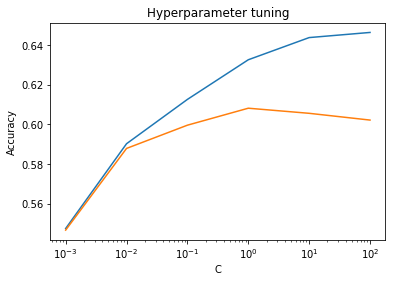

In [0]:
from matplotlib import pyplot as plt
plt.plot(C_list, mean_train)
plt.plot(C_list, mean_test)
plt.title('Hyperparameter tuning')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [0]:
# Test
clf_lr = LogisticRegression(C=1)
clf_lr.fit(X_train, y_train)
print(clf_lr.score(X_train, y_train))
print(clf_lr.score(X_test, y_test))

D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\condo\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6331565413050466
0.6036644165863067
